Advanced Lane Finding

This will be used to create imagery for the writeup

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

import lanefind

Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

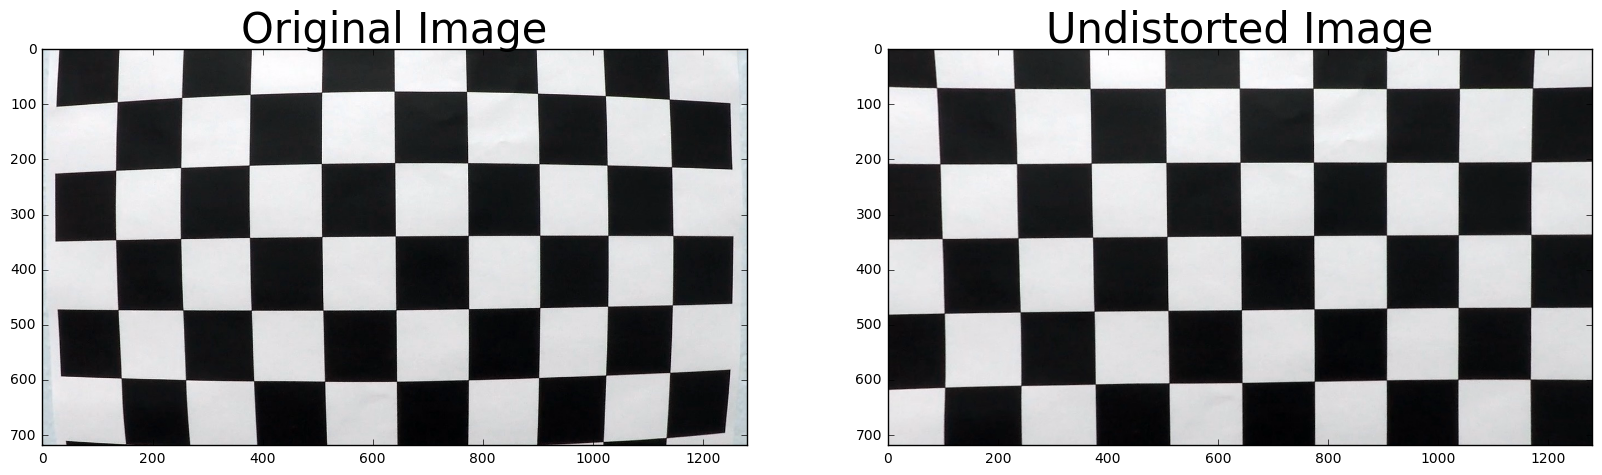

In [2]:
img = cv2.imread('camera_cal/calibration1.jpg')
dst = lanefind.correctCameraDistortion(img)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Apply a distortion correction to raw images

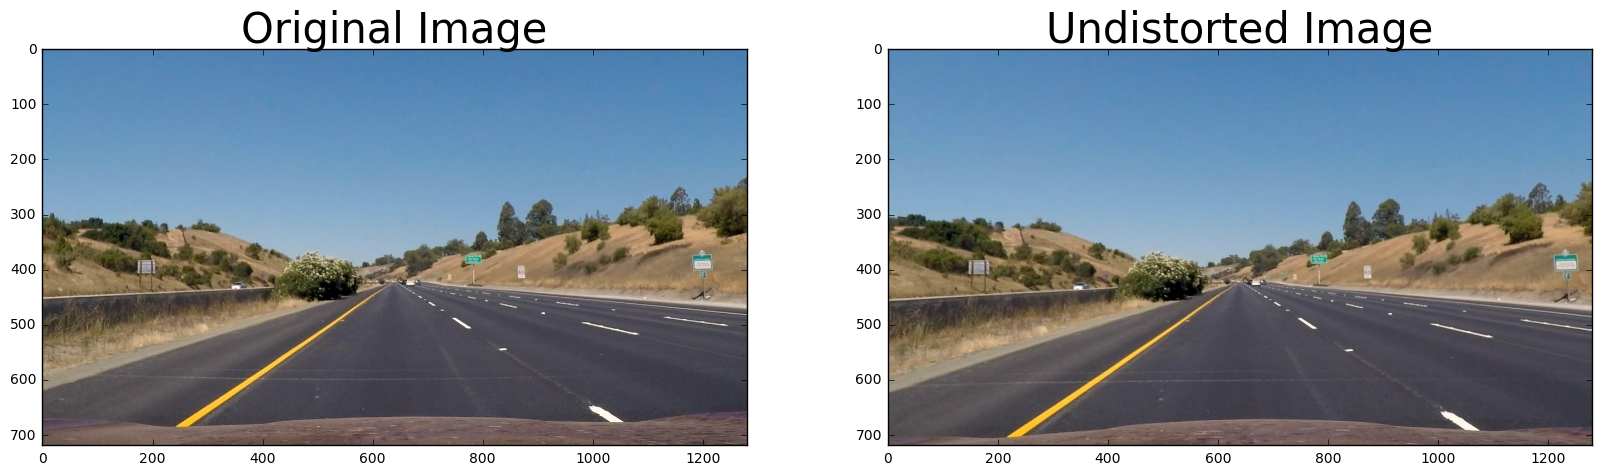

In [3]:
raw_images = ['straight_lines1.jpg','straight_lines2.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
file_name='test_images/'+raw_images[0]
#img = cv2.imread(file_name)
# open it RGB
img = mpimg.imread(file_name)

dst = lanefind.correctCameraDistortion(img)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

Use color transforms, gradients, etc., to create a thresholded binary image

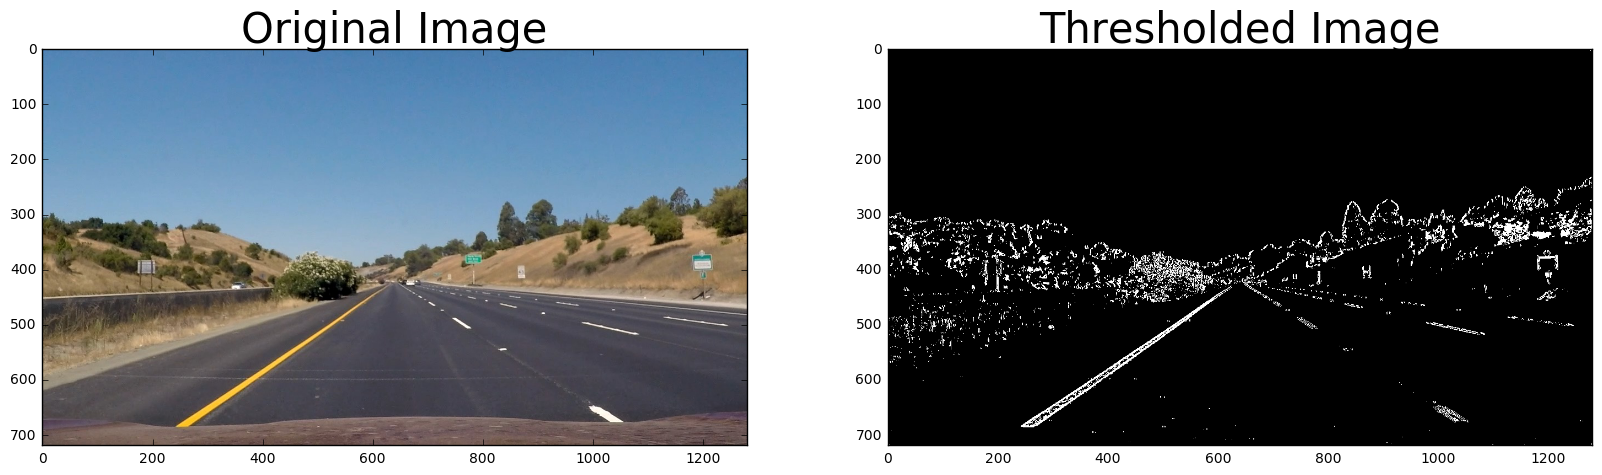

In [4]:
raw_images = ['straight_lines1.jpg','straight_lines2.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
file_name='test_images/'+raw_images[0]
#img = cv2.imread(file_name)
# open it RGB
orig_img = mpimg.imread(file_name)
# threshold the image and try to pull just the lines out
dst = lanefind.color_gradient_pipeline(orig_img, (120, 254), (30, 100))
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(orig_img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst,cmap='gray')

ax2.set_title('Thresholded Image', fontsize=30)




Project the Image into a Birds-eye view

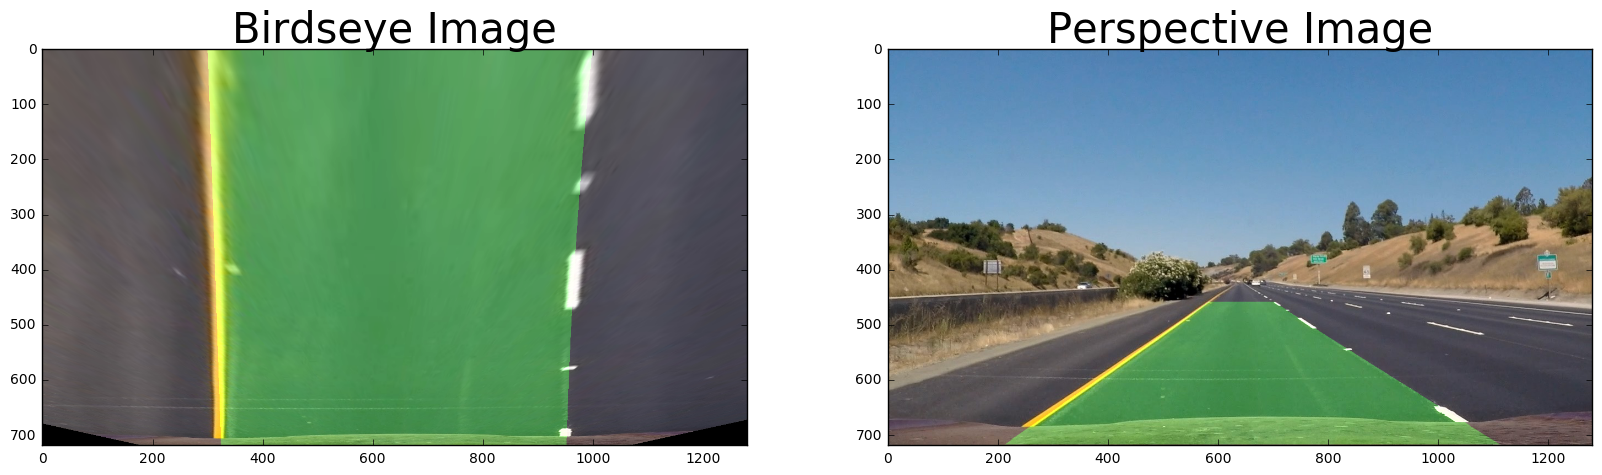

In [5]:
def drawOutputNoWarp(orig,left_fitx,right_fitx,ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(orig[:,:,0]).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    #newwarp=projectBirdToImage(color_warp)
    # Combine the result with the original image
    result = cv2.addWeighted(orig, 1, color_warp, 0.3, 0)
    return result

raw_images = ['straight_lines1.jpg','straight_lines2.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
file_name='test_images/'+raw_images[0]
#img = cv2.imread(file_name)
# open it RGB
orig_img = mpimg.imread(file_name)
top_img=lanefind.projectImageToBird(orig_img)

# threshold the image and try to pull just the lines out
img = lanefind.color_gradient_pipeline(orig_img, (120, 254), (30, 100))

# switch to birds eye projection
warped=lanefind.projectImageToBird(img)
# fix the image to be 0-255 instead of 0-1
binary_warped = np.uint8(warped*255)
# find the lanes using the historgram method
leftx,lefty,rightx,righty = lanefind.findLanesByHistogram(binary_warped)
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
out = lanefind.drawOutput(orig_img,left_fitx,right_fitx,ploty)
top_img=drawOutputNoWarp(top_img,left_fitx,right_fitx,ploty)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(top_img)
ax1.set_title('Birdseye Image', fontsize=30)
ax2.imshow(out)
ax2.set_title('Perspective Image', fontsize=30)


test_images/straight_lines1.jpg


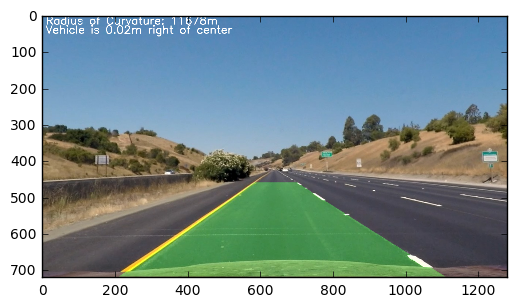

test_images/straight_lines2.jpg


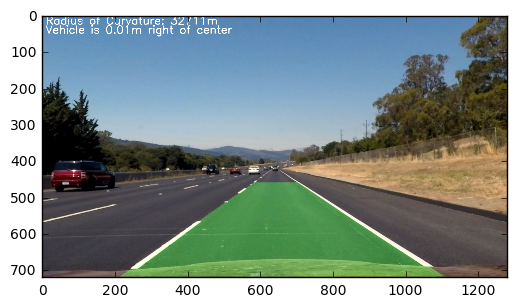

test_images/test1.jpg


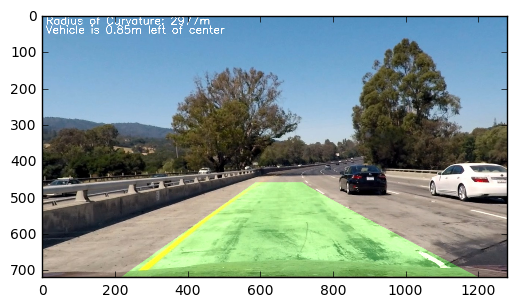

test_images/test2.jpg


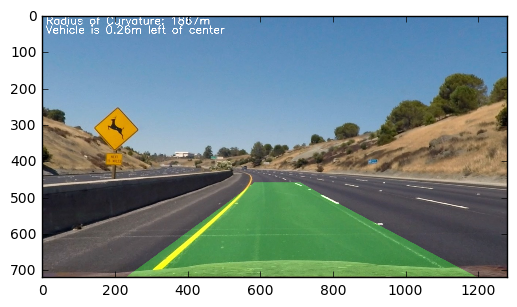

test_images/test3.jpg


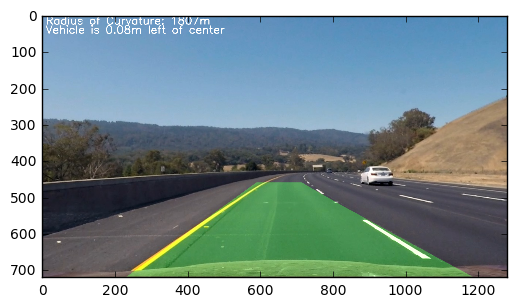

test_images/test4.jpg


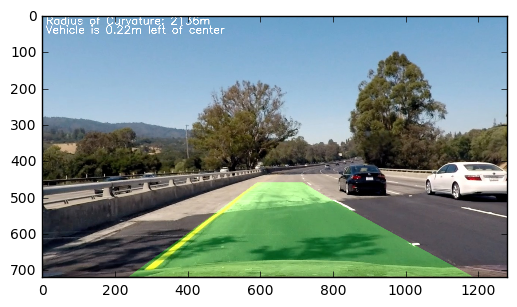

test_images/test5.jpg


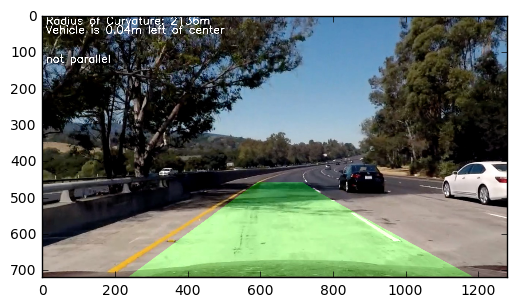

test_images/test6.jpg


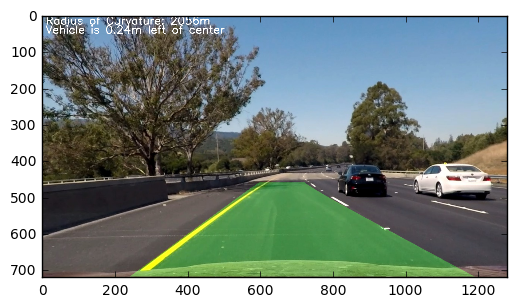

In [6]:
raw_images = ['straight_lines1.jpg','straight_lines2.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
for image_name in raw_images:
    file_name='test_images/'+image_name
    print(file_name)

    #file_name='test_images/'+raw_images[1]
    #img = cv2.imread(file_name)
    # open it RGB
    orig_img = mpimg.imread(file_name)
    final_img = lanefind.lanePipeline(orig_img)
  

    plt.imshow(final_img)
    plt.show()

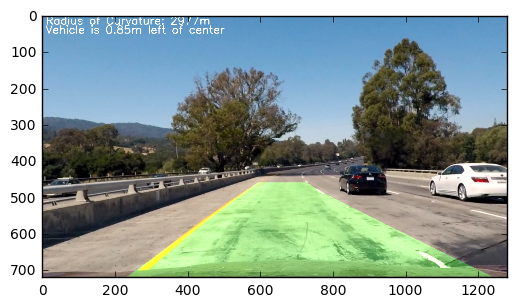

In [9]:
raw_images = ['straight_lines1.jpg','straight_lines2.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg','test5.jpg','test6.jpg']
file_name='test_images/'+raw_images[2]
# open it RGB
orig_img = mpimg.imread(file_name)
final_img = lanefind.lanePipeline(orig_img)
mpimg.imsave("final.png", final_img)

plt.imshow(final_img)
plt.show()